# 1-D Radiative transfer equation with absorption and scattering

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
# parameters for the grid
N = 100
q = np.ones(N) * 1/N #assuming rho_inc = 0
alpha = 1.
epsilon = 0.1

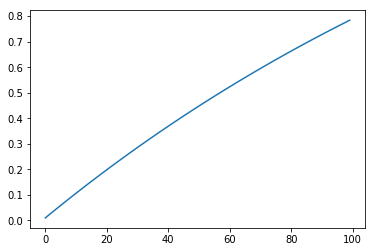

In [23]:
A = np.identity(N)
for i in range(N):
    if i < (N - 1):
        A[i + 1, i] = -1 - (1- epsilon)/N * alpha/2
    A[i, i] += alpha/N - (1- epsilon)/N * alpha/2
    
rho = np.linalg.solve(A, q)

plt.plot(range(len(rho)), rho)

# 2D absorption

In [2]:
n = 20
n_omega = [1, 1]
n_omega = n_omega/np.linalg.norm(n_omega)
alpha = 0. #absorption
q0 = 1.

#boundary condition
rho_inc = 0.

In [4]:
A = np.zeros((n**2, n**2))

for k in range(n):
    for j in range(n):
        A[k*n+j, k*n+j] = 1./n * np.sum(n_omega)
    for j in range(1, n):
        A[k*n+j, k*n+j-1] = -1./n * n_omega[0]
        
for k 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Finite Volume:

1. choose a mesh with cells $V_i, \rho$ piecewise constant, same for $\phi$, i.e.

$$\rho, \phi \in V_n$$

2. integrate by parts
3. use upwinding (essentially the difference of cont vs discont Galerkin)

$$ \rho_x(y) = \sum_{V_i} ( \, - \int_{V_i} \rho (n_{\omega} * \nabla) \phi \,dx + \int_{\partial V_{i}^{-}} \rho^{\uparrow} \phi (n_\omega * n_{V_i}) \,ds + \int_{\partial V_{i}^{+}} \rho \phi (n_\omega * n_{V_i}) \,ds ) \, $$
